In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
bankingmarketing=pd.read_csv(r"D:\Data Science\Python\Python Project\bank_marketing_updated_v1.csv", header=2)

In [15]:
bankingmarketing.head()

customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1         0  unknown       no  
2     -1         0  unknown       no  
3     -1         0  unknown       no  
4     -1         0  unknown       no

In [23]:
bankingmarketing.dtypes

customerid      int64
age           float64
salary          int64
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object

In [24]:
bankingmarketing.shape

(45211, 19)

In [25]:
print(bankingmarketing.isnull().sum())

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64


In [26]:
bankingmarketing['salary'].value_counts()

20000     9732
100000    9458
60000     9176
50000     5171
70000     4154
55000     2264
120000    1487
8000      1303
16000     1240
4000       938
0          288
Name: salary, dtype: int64

# 2. Descriptive Statistics using python

### Mean

In [100]:
Sl = pd.read_csv(r"D:\Data Science\Python\Python Project\bank_marketing_updated_v1.csv",header=2)

In [74]:
Total = 0
for i in Sl.salary:
    Total += i
Total/len(Sl.salary)

57006.17106456393

In [75]:
np.mean(Sl.salary)

57006.17106456393

### Median

In [77]:
np.sort(Sl.salary)

array([     0,      0,      0, ..., 120000, 120000, 120000], dtype=int64)

In [81]:
salary = np.sort(Sl.salary)
def med_salary(salary):
    length = len(salary)
    if length%2==0:
        return (salary[length/2] - salary[length//2-1])/2
    else:
        return salary[length//2]
    

In [83]:
med_salary(salary)

60000

# 3.Univariate Analysis

In [158]:
age=bankingmarketing.age.value_counts(normalize=True)*100
age

32.0    4.613751
31.0    4.412383
33.0    4.363701
34.0    4.268549
35.0    4.186674
          ...   
93.0    0.004426
90.0    0.004426
95.0    0.004426
88.0    0.004426
94.0    0.002213
Name: age, Length: 77, dtype: float64

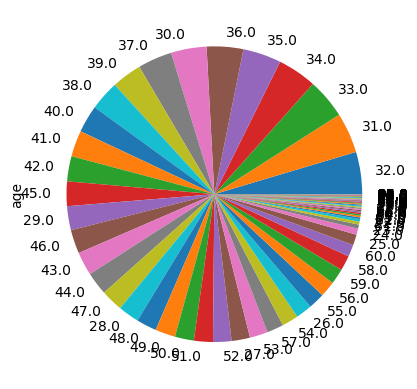

In [144]:
age.plot.pie()
plt.show()

In [159]:
balance=bankingmarketing.balance.value_counts(normalize=True)
balance

 0        0.077724
 1        0.004313
 2        0.003450
 4        0.003074
 3        0.002964
            ...   
-381      0.000022
 4617     0.000022
 20584    0.000022
 4358     0.000022
 16353    0.000022
Name: balance, Length: 7168, dtype: float64

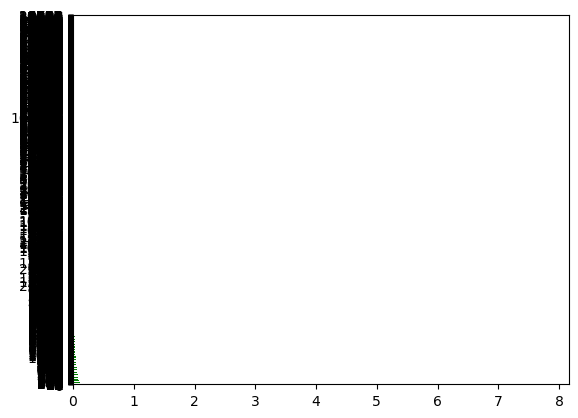

In [152]:
balance.plot.barh(color='g')
plt.show()

In [155]:
duration=bankingmarketing.duration.value_counts(normalize=True)
duration

1.5 min                 0.003052
1.68333333333333 min    0.002853
2.06666666666667 min    0.002853
1.73333333333333 min    0.002809
2.03333333333333 min    0.002809
                          ...   
1500 sec                0.000022
22.1666666666667 min    0.000022
868 sec                 0.000022
1269 sec                0.000022
16.2833333333333 min    0.000022
Name: duration, Length: 2646, dtype: float64

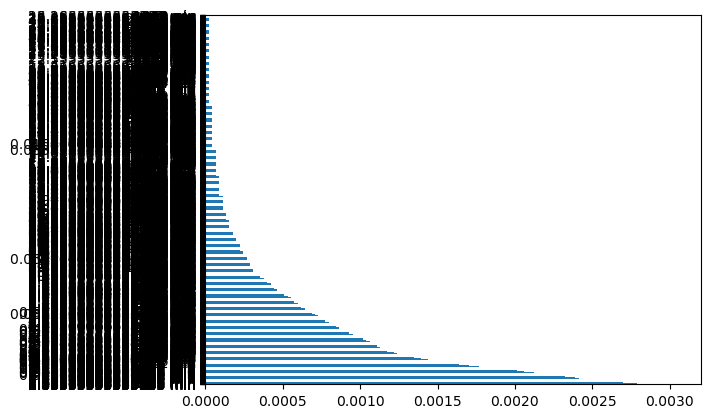

In [165]:
duration.plot.barh()
plt.show()

# Bivariate Analysis

In [35]:
grouped = bankingmarketing.groupby(['jobedu','marital'])['campaign'].mean().reset_index()

In [36]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Job Type')

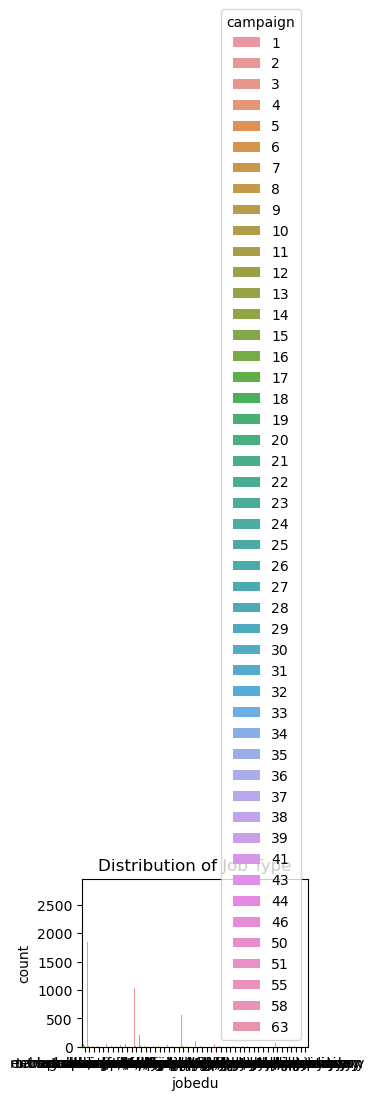

In [46]:
plt.subplot(2, 2, 1)
sns.countplot(data=bankingmarketing, x='jobedu', hue='campaign')
plt.title('Distribution of Job Type')

Text(0.5, 1.0, 'Distribution of Marital Status')

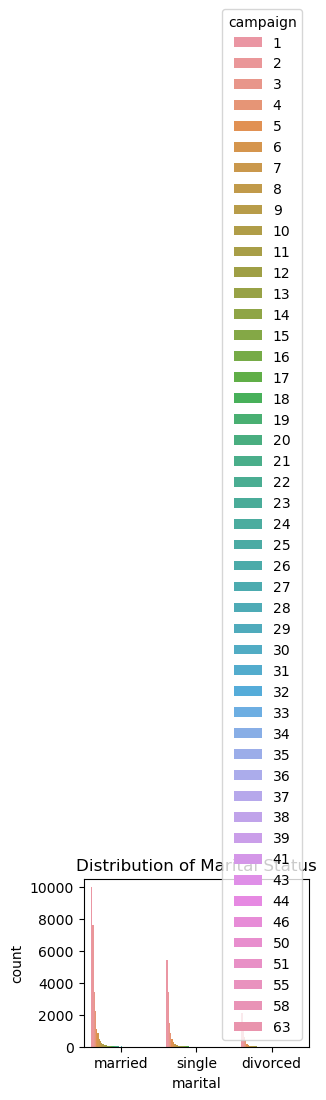

In [47]:
plt.subplot(2, 2, 1)
sns.countplot(data=bankingmarketing, x='marital', hue='campaign')
plt.title('Distribution of Marital Status')

Text(0.5, 1.0, 'Success of Term Deposit by Job Type')

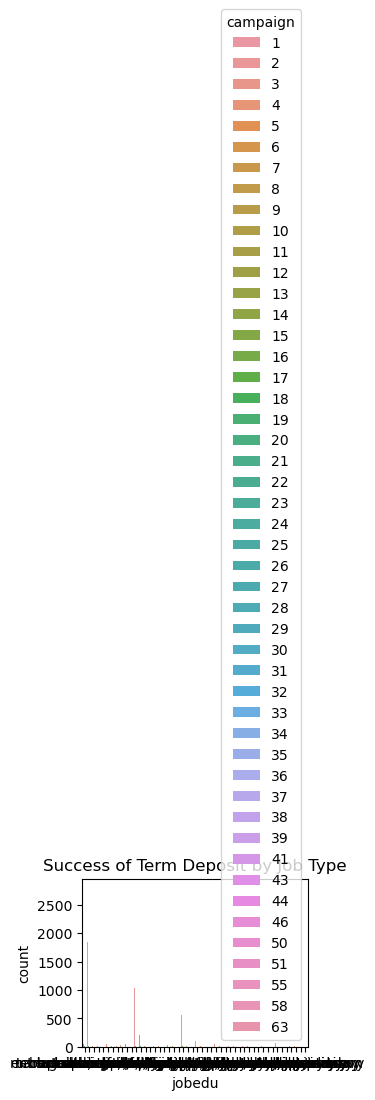

In [50]:
plt.subplot(2, 2, 1)
sns.countplot(data=bankingmarketing, x='jobedu', hue='campaign')
plt.title('Success of Term Deposit by Job Type')

Text(0.5, 1.0, 'Success of Term Deposit by Job Type')

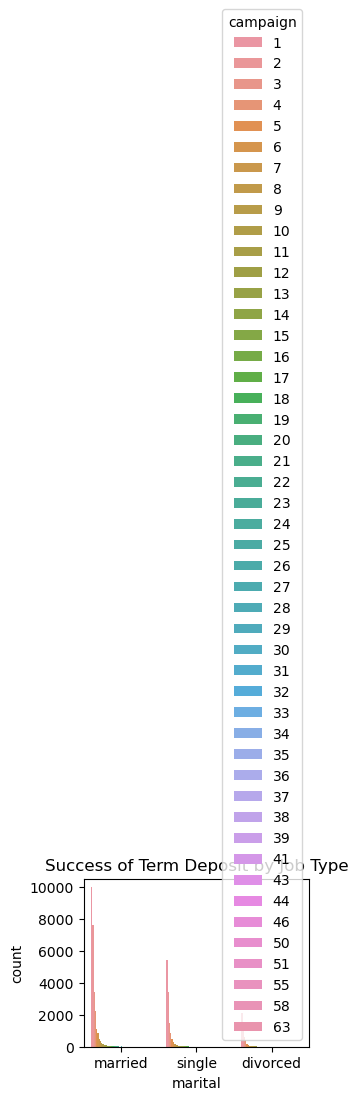

In [51]:
plt.subplot(2, 2, 2)
sns.countplot(data=bankingmarketing, x='marital', hue='campaign')
plt.title('Success of Term Deposit by Job Type')

In [52]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [63]:
pivot_table = bankingmarketing.pivot_table(index='jobedu', columns='marital',aggfunc='size', fill_value=0)

In [64]:
print("\nPivot Table:")
print(pivot_table)


Pivot Table:
marital                  divorced  married  single
jobedu                                            
admin.,primary                 30      149      30
admin.,secondary              648     2195    1376
admin.,tertiary                54      242     276
admin.,unknown                 18      107      46
blue-collar,primary           320     2920     518
blue-collar,secondary         387     3672    1312
blue-collar,tertiary            4       60      85
blue-collar,unknown            39      316      99
entrepreneur,primary            9      156      18
entrepreneur,secondary         67      403      72
entrepreneur,tertiary          97      453     136
entrepreneur,unknown            6       58      12
housemaid,primary              90      495      42
housemaid,secondary            70      270      55
housemaid,tertiary             18      114      41
housemaid,unknown               6       33       6
management,primary             26      249      19
management,second

# Categorical Variables Analysis

In [16]:
categorical_vars = ['jobedu', 'marital']

In [19]:
jobedu=bankingmarketing.jobedu.value_counts(normalize=True)*100
jobedu

management,tertiary        17.254650
blue-collar,secondary      11.879852
technician,secondary       11.565769
admin.,secondary            9.331800
blue-collar,primary         8.312136
services,secondary          7.646369
technician,tertiary         4.352923
management,secondary        2.479485
retired,secondary           2.176461
self-employed,tertiary      1.842472
retired,primary             1.758422
unemployed,secondary        1.610228
entrepreneur,tertiary       1.517330
housemaid,primary           1.386831
self-employed,secondary     1.276238
admin.,tertiary             1.265179
entrepreneur,secondary      1.198823
student,secondary           1.123620
blue-collar,unknown         1.004180
housemaid,secondary         0.873681
retired,tertiary            0.809538
services,primary            0.763089
management,primary          0.650284
unemployed,tertiary         0.639225
unemployed,primary          0.568446
management,unknown          0.535268
technician,unknown          0.535268
s

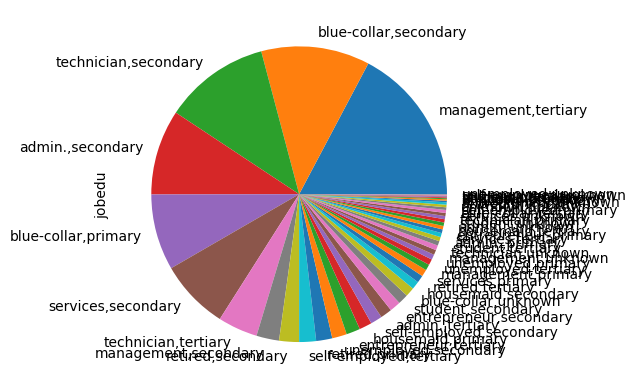

In [21]:
jobedu.plot.pie()
plt.show()

In [25]:
bankingmarketing.groupby("marital")["campaign"].mean()

marital
divorced    2.630882
married     2.842875
single      2.649805
Name: campaign, dtype: float64

<Axes: ylabel='marital'>

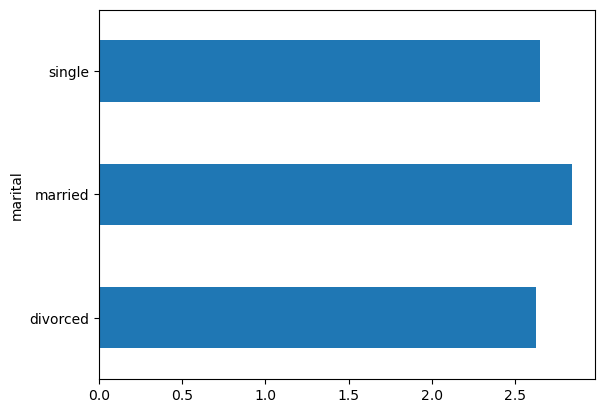

In [26]:
(bankingmarketing.groupby("marital")["campaign"].mean()).plot.barh()

# Feature Engineering

<Axes: xlabel='campaign', ylabel='age'>

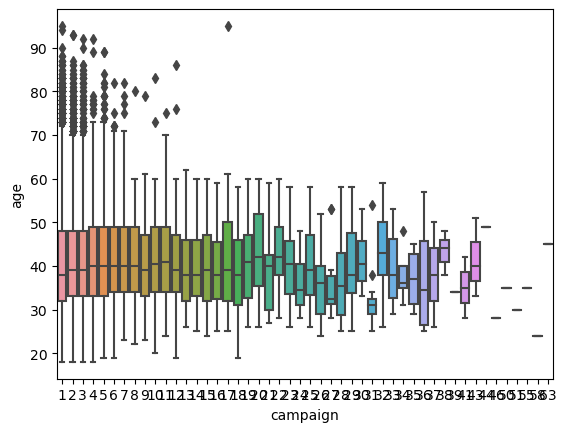

In [28]:
sns.boxplot(data=bankingmarketing,x='campaign',y='age')

In [39]:
bankingmarketing["age_group"]= pd.cut(bankingmarketing.age,[20,30,40,50,60,95],labels=["20-30", "30-40", "40-50","50-60","60+"])

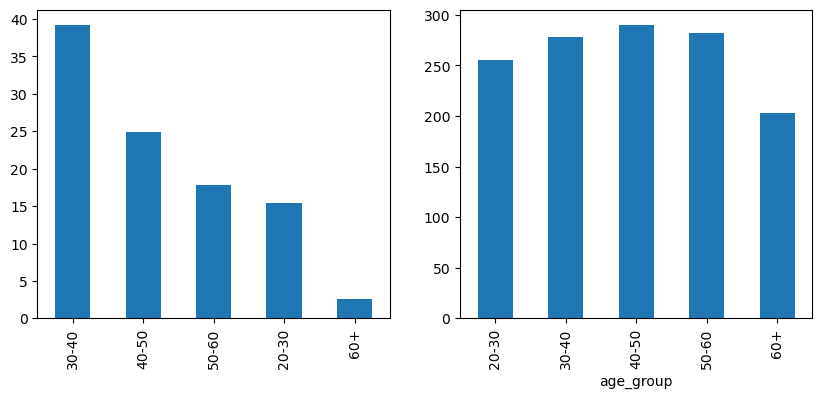

In [41]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
(bankingmarketing.age_group.value_counts(normalize=True)*100).plot.bar()
plt.subplot(1,2,2)
(bankingmarketing.groupby(['age_group'])['campaign'].mean()*100).plot.bar()
plt.show()

# Correlation Analysis

In [46]:
correlation_matrix = bankingmarketing.corr()

C:\Users\sanja\AppData\Local\Temp\ipykernel_37708\922015572.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bankingmarketing.corr()


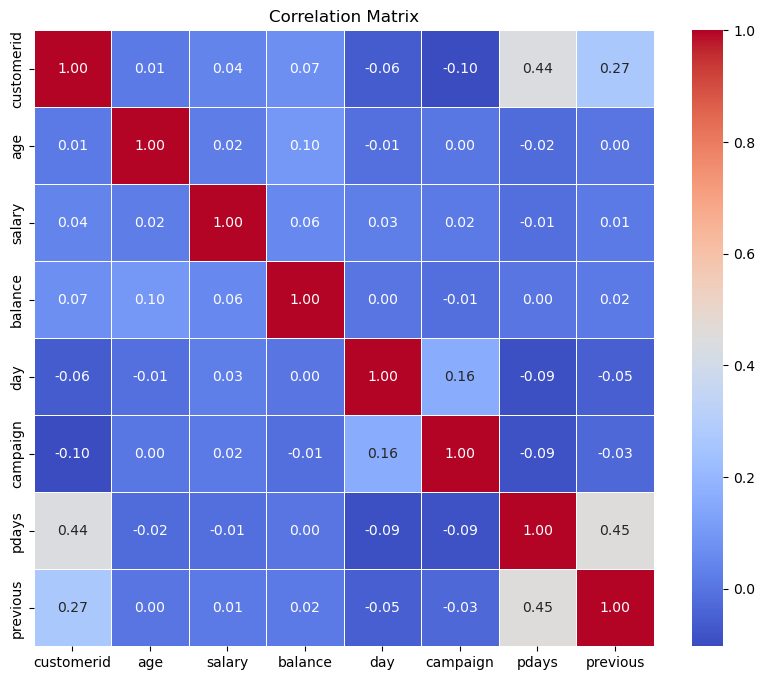

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Outliers

In [48]:
 bankingmarketing.salary.describe()

count     45211.000000
mean      57006.171065
std       32085.718415
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<Axes: >

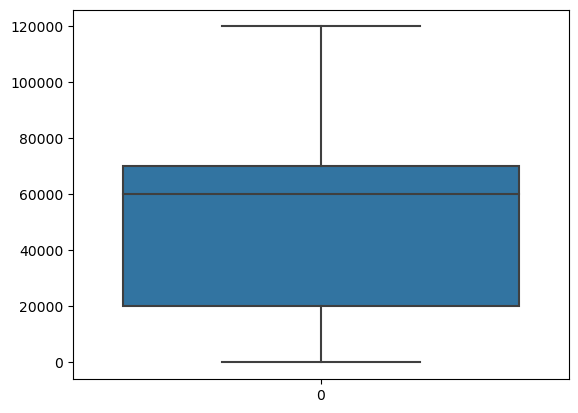

In [49]:
sns.boxplot( bankingmarketing.salary)

In [50]:
bankingmarketing.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: >

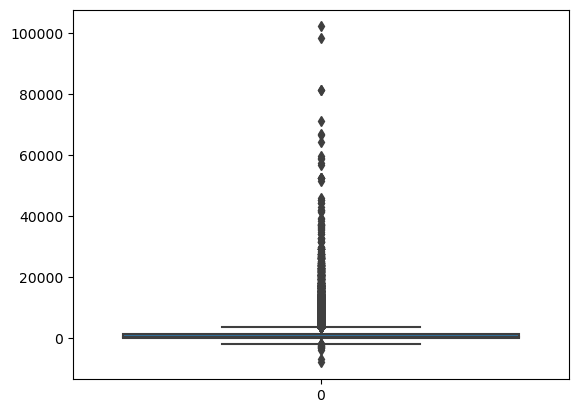

In [51]:
sns.boxplot(bankingmarketing.balance)

<Axes: >

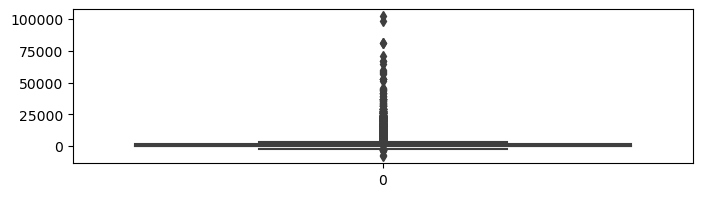

In [52]:
plt.figure(figsize=(8,2))
sns.boxplot(bankingmarketing.balance)

In [53]:
bankingmarketing.balance.quantile([0.5, 0.7, 0.9, 0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3574.0
0.95     5768.0
0.99    13164.9
Name: balance, dtype: float64